## Importing data and Libraries 

In [1]:
%pip install matplotlib_inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

import plotly.express as px
import plotly.io as pio

from collections import Counter


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Load data

In [2]:

student_df = pd.read_csv('student_df.csv')

In [3]:
student_df.head(20)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Walc,health,absences,G1,G2,G3,absences %,absences_category,average_grade,grade_category
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,1,3,6,25,30,30,3.33,Average,28.33,very low
1,F,17,U,GT3,T,1,1,at_home,other,course,...,1,3,4,25,25,30,2.22,Low,26.67,very low
2,F,15,U,LE3,T,1,1,at_home,other,other,...,3,3,10,35,40,50,5.56,Average,41.67,low
3,F,15,U,GT3,T,4,2,health,services,home,...,1,5,2,75,70,75,1.11,Zero,73.33,high
4,F,16,U,GT3,T,3,3,other,other,home,...,2,5,4,30,50,50,2.22,Low,43.33,low
5,M,16,U,LE3,T,4,3,services,other,reputation,...,2,5,10,75,75,75,5.56,Average,75.00,high
6,M,16,U,LE3,T,2,2,other,other,home,...,1,3,0,60,60,55,0.00,Zero,58.33,average
7,F,17,U,GT3,A,4,4,other,teacher,home,...,1,1,6,30,25,30,3.33,Average,28.33,very low
8,M,15,U,LE3,A,3,2,services,other,home,...,1,1,0,80,90,95,0.00,Zero,88.33,high
9,M,15,U,GT3,T,3,4,other,other,home,...,1,5,0,70,75,75,0.00,Zero,73.33,high


## Preprocessing data for ML

In [4]:
student_df.dtypes

sex                   object
age                    int64
address               object
famsize               object
Pstatus               object
Medu                   int64
Fedu                   int64
Mjob                  object
Fjob                  object
reason                object
guardian              object
traveltime             int64
studytime              int64
failures               int64
schoolsup             object
famsup                object
paid                  object
activities            object
nursery               object
higher                object
internet              object
romantic              object
famrel                 int64
freetime               int64
goout                  int64
Dalc                   int64
Walc                   int64
health                 int64
absences               int64
G1                     int64
G2                     int64
G3                     int64
absences %           float64
absences_category     object
average_grade 

In [5]:
categorical_cols = student_df.select_dtypes(include=['object','category']).columns

In [6]:
#Print categorical columns 
print(categorical_cols)

Index(['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
       'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'absences_category',
       'grade_category'],
      dtype='object')


In [7]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                390 non-null    object 
 1   age                390 non-null    int64  
 2   address            390 non-null    object 
 3   famsize            390 non-null    object 
 4   Pstatus            390 non-null    object 
 5   Medu               390 non-null    int64  
 6   Fedu               390 non-null    int64  
 7   Mjob               390 non-null    object 
 8   Fjob               390 non-null    object 
 9   reason             390 non-null    object 
 10  guardian           390 non-null    object 
 11  traveltime         390 non-null    int64  
 12  studytime          390 non-null    int64  
 13  failures           390 non-null    int64  
 14  schoolsup          390 non-null    object 
 15  famsup             390 non-null    object 
 16  paid               390 non

### Note: Fedu and Medu are on a scale of 0-4 where every other ordinal feature is on a scale of 1-5

Medu: Mother's education level (0 - none, 1 - Elementary School 1, 2 - Elementary School 2, 3 - High School or 4 - Higher Education)

Fedu: Father's education level (0 - none, 1 - Elementary School 1, 2 - Elementary School 2, 3 - High School or 4 - Higher Education)

In [8]:
#Note: Fedu and Medu are on a scale of 0-4 where every other ordinal feature is on a scale of 1-5
student_df['Medu'].value_counts()

Medu
4    130
2    102
3     97
1     58
0      3
Name: count, dtype: int64

## Preprocessing 
### Columns to convert to categories:
Note: One-hot encoding is not the best approach for these columns as they are Ordinal and preserving their order is essential.
Medu: Mothers level of education (Ordinal) Fedu: Fathers level of education (Ordinal)

famrel: Quality of family relationships (categorical: from 1 - very bad to 5 - excellent) Ordinal

freetime: Free time after school (categorical: from 1 - very low to 5 - very high) Ordinal

goout: Time with friends (categorical: from 1 - very low to 5 - very high) Ordinal

Dalc: Alcohol consumption on the work day (categorical: from 1 - very low to 5 - very high) Ordinal

Walc: Alcohol consumption on the weekend (categorical: from 1 - very low to 5 - very high) Ordinal

health: Current health status (categorical: from 1 - very bad to 5 - very good) Ordinal

grade_category: Grade status (categorical: low - very high) Ordinal

absence_category: Absence rate (None-High) Ordinal

failures: Number of past classes failed (0-4) Ordinal 

In [9]:
from sklearn.preprocessing import OrdinalEncoder

ordinal1_columns = ['famrel','freetime','goout','Dalc','Walc','health','grade_category','failures']


ordinal2_columns = ['Medu', 'Fedu']

df_encoded = student_df.copy()
#OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

#Ordinal columns except Fedu and Medu
df_encoded[ordinal1_columns] = ordinal_encoder.fit_transform(df_encoded[ordinal1_columns])


#Fedu and Medu 
df_encoded[ordinal2_columns] = ordinal_encoder.fit_transform(df_encoded[ordinal2_columns])

In [10]:
df_encoded['absences_category'].value_counts()

absences_category
Zero       182
Average     85
High        64
Low         59
Name: count, dtype: int64

In [11]:
# Define the ordinal mapping for absence_category
absence_mapping = {'Zero':0,'Low': 1, 'Average': 2, 'High': 3}

# Apply the mapping
df_encoded['absences_category'] = df_encoded['absences_category'].map(absence_mapping)


In [12]:
student_df['failures'].value_counts()

failures
0    311
1     50
2     15
3     14
Name: count, dtype: int64

## feature engineering: Reducing complexity of failures to just 0 for no classes failed and 1 for 1 or more classes failed.

In [13]:
# Define mapping for failures 
failures_mapping = {0:0,1: 1, 2: 1, 3: 1}

# Apply the mapping
df_encoded['failures'] = df_encoded['failures'].map(failures_mapping)

## Preprocessing: binary features mannually instead of using getdummies().

Using getdummies on these feature would lead to redundancy since each feature would have two features created to represent 'yes' and 'no' seperately
Binary features:


'yes' and 'no'



schoolsup

famsup

paid

activities

nursery

higher

internet

romantic

In [14]:
#Binary features mapping

binary_columns = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']


df_encoded[binary_columns] = df_encoded[binary_columns].apply(lambda x : x.map({'yes':1, 'no':0}))

In [15]:
df_encoded[binary_columns].head()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,0,0,0,1,1,0,0
1,0,1,0,0,0,1,1,0
2,1,0,1,0,1,1,1,0
3,0,1,1,1,1,1,1,1
4,0,1,1,0,1,1,0,0


In [16]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                390 non-null    object 
 1   age                390 non-null    int64  
 2   address            390 non-null    object 
 3   famsize            390 non-null    object 
 4   Pstatus            390 non-null    object 
 5   Medu               390 non-null    float64
 6   Fedu               390 non-null    float64
 7   Mjob               390 non-null    object 
 8   Fjob               390 non-null    object 
 9   reason             390 non-null    object 
 10  guardian           390 non-null    object 
 11  traveltime         390 non-null    int64  
 12  studytime          390 non-null    int64  
 13  failures           390 non-null    int64  
 14  schoolsup          390 non-null    int64  
 15  famsup             390 non-null    int64  
 16  paid               390 non

### Preprocessing:

## Binary encoding for other

sex address famsize Pstatus

['sex','address','famsize','Pstatus']

In [17]:
df_encoded.select_dtypes(include=['object','category']).columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
       'guardian'],
      dtype='object')

In [18]:
object_cols = df_encoded.select_dtypes(include=['object','category']).columns

In [19]:
df_encoded[object_cols].head()

,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian
0,F,U,GT3,A,at_home,teacher,course,mother
1,F,U,GT3,T,at_home,other,course,father
2,F,U,LE3,T,at_home,other,other,mother
3,F,U,GT3,T,health,services,home,mother
4,F,U,GT3,T,other,other,home,father


In [20]:
# Mapping binary columns to 0 and 1
df_encoded['sex'] = df_encoded['sex'].map({'F': 0, 'M': 1})
df_encoded['address'] = df_encoded['address'].map({'R': 0, 'U': 1})
df_encoded['famsize'] = df_encoded['famsize'].map({'LE3': 0, 'GT3': 1})
df_encoded['Pstatus'] = df_encoded['Pstatus'].map({'A': 0, 'T': 1})

## One-hot encoding on remaining nominal features

In [21]:
# One-hot encoding nominal columns
one_hot_columns = ['Mjob', 'Fjob', 'reason', 'guardian']
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_columns, drop_first=True)

In [22]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                390 non-null    int64  
 1   age                390 non-null    int64  
 2   address            390 non-null    int64  
 3   famsize            390 non-null    int64  
 4   Pstatus            390 non-null    int64  
 5   Medu               390 non-null    float64
 6   Fedu               390 non-null    float64
 7   traveltime         390 non-null    int64  
 8   studytime          390 non-null    int64  
 9   failures           390 non-null    int64  
 10  schoolsup          390 non-null    int64  
 11  famsup             390 non-null    int64  
 12  paid               390 non-null    int64  
 13  activities         390 non-null    int64  
 14  nursery            390 non-null    int64  
 15  higher             390 non-null    int64  
 16  internet           390 non

### df_encoded is now clean and ready normalization:

Note: I don't need to normalize my binary features. However I have a few features with different ranges such as 'age', 'G1', 'G2', 'G3'(Grades for semester 1-3)

### Note: I should not normalise my Ordinal features!

## Scaling data using StandardScaler()

In [23]:
from sklearn.preprocessing import StandardScaler

continuous_numeric_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'absences', 'absences %', 'G1', 'G2', 'G3', 'average_grade']

# Apply standard scaling
scaler = StandardScaler()
df_encoded[continuous_numeric_columns] = scaler.fit_transform(df_encoded[continuous_numeric_columns])

In [24]:
df_encoded['average_grade'].min()

-2.5325269533163794

In [25]:
df_encoded['average_grade'].max()

2.350172726636696

### Note: Scaled average grade range is from -2.53 to 2.34

## Correlation matrix

In [26]:
df_encoded.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,1.128638,1,1,0,1.141292,1.348907,0.784963,-0.049004,0,...,False,False,False,False,True,False,False,False,True,False
1,0,0.294985,1,1,1,-1.600621,-1.410220,-0.645577,-0.049004,0,...,False,False,True,False,False,False,False,False,False,False
2,0,-1.372321,1,0,1,-1.600621,-1.410220,-0.645577,-0.049004,1,...,False,False,True,False,False,False,True,False,True,False
3,0,-1.372321,1,1,1,1.141292,-0.490511,-0.645577,1.145473,0,...,False,False,False,True,False,True,False,False,True,False
4,0,-0.538668,1,1,1,0.227321,0.429198,-0.645577,-0.049004,0,...,False,False,True,False,False,True,False,False,False,False


In [27]:
df_encoded.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'absences %', 'absences_category', 'average_grade',
       'grade_category', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_mother', 'guardian_other'],
      dtype='object')

In [28]:
#Calculate the Correlation Matrix
correlation_matrix = df_encoded.corr()

In [29]:
print(correlation_matrix)

                        sex       age       address   famsize   Pstatus  \
sex                1.000000 -0.061020 -2.686681e-02 -0.090346  0.039391   
age               -0.061020  1.000000 -1.580659e-01 -0.051760  0.065552   
address           -0.026867 -0.158066  1.000000e+00 -0.070705 -0.034902   
famsize           -0.090346 -0.051760 -7.070496e-02  1.000000  0.145074   
Pstatus            0.039391  0.065552 -3.490171e-02  0.145074  1.000000   
Medu               0.086947 -0.168648  1.315082e-01  0.040785 -0.130456   
Fedu               0.044419 -0.136437  7.024108e-02  0.063767 -0.095901   
traveltime         0.069203  0.092583 -3.325089e-01 -0.064728  0.019563   
studytime         -0.297699  0.022115 -2.523995e-02  0.078559  0.016335   
failures           0.037466  0.249725 -9.772397e-02 -0.001551  0.019139   
schoolsup         -0.136100 -0.253314  2.515408e-02  0.029790 -0.048167   
famsup            -0.143791 -0.127756  1.947687e-02  0.122437  0.017568   
paid              -0.1236

In [30]:
df_encoded['absences_category'].value_counts()

absences_category
0    182
2     85
3     64
1     59
Name: count, dtype: int64

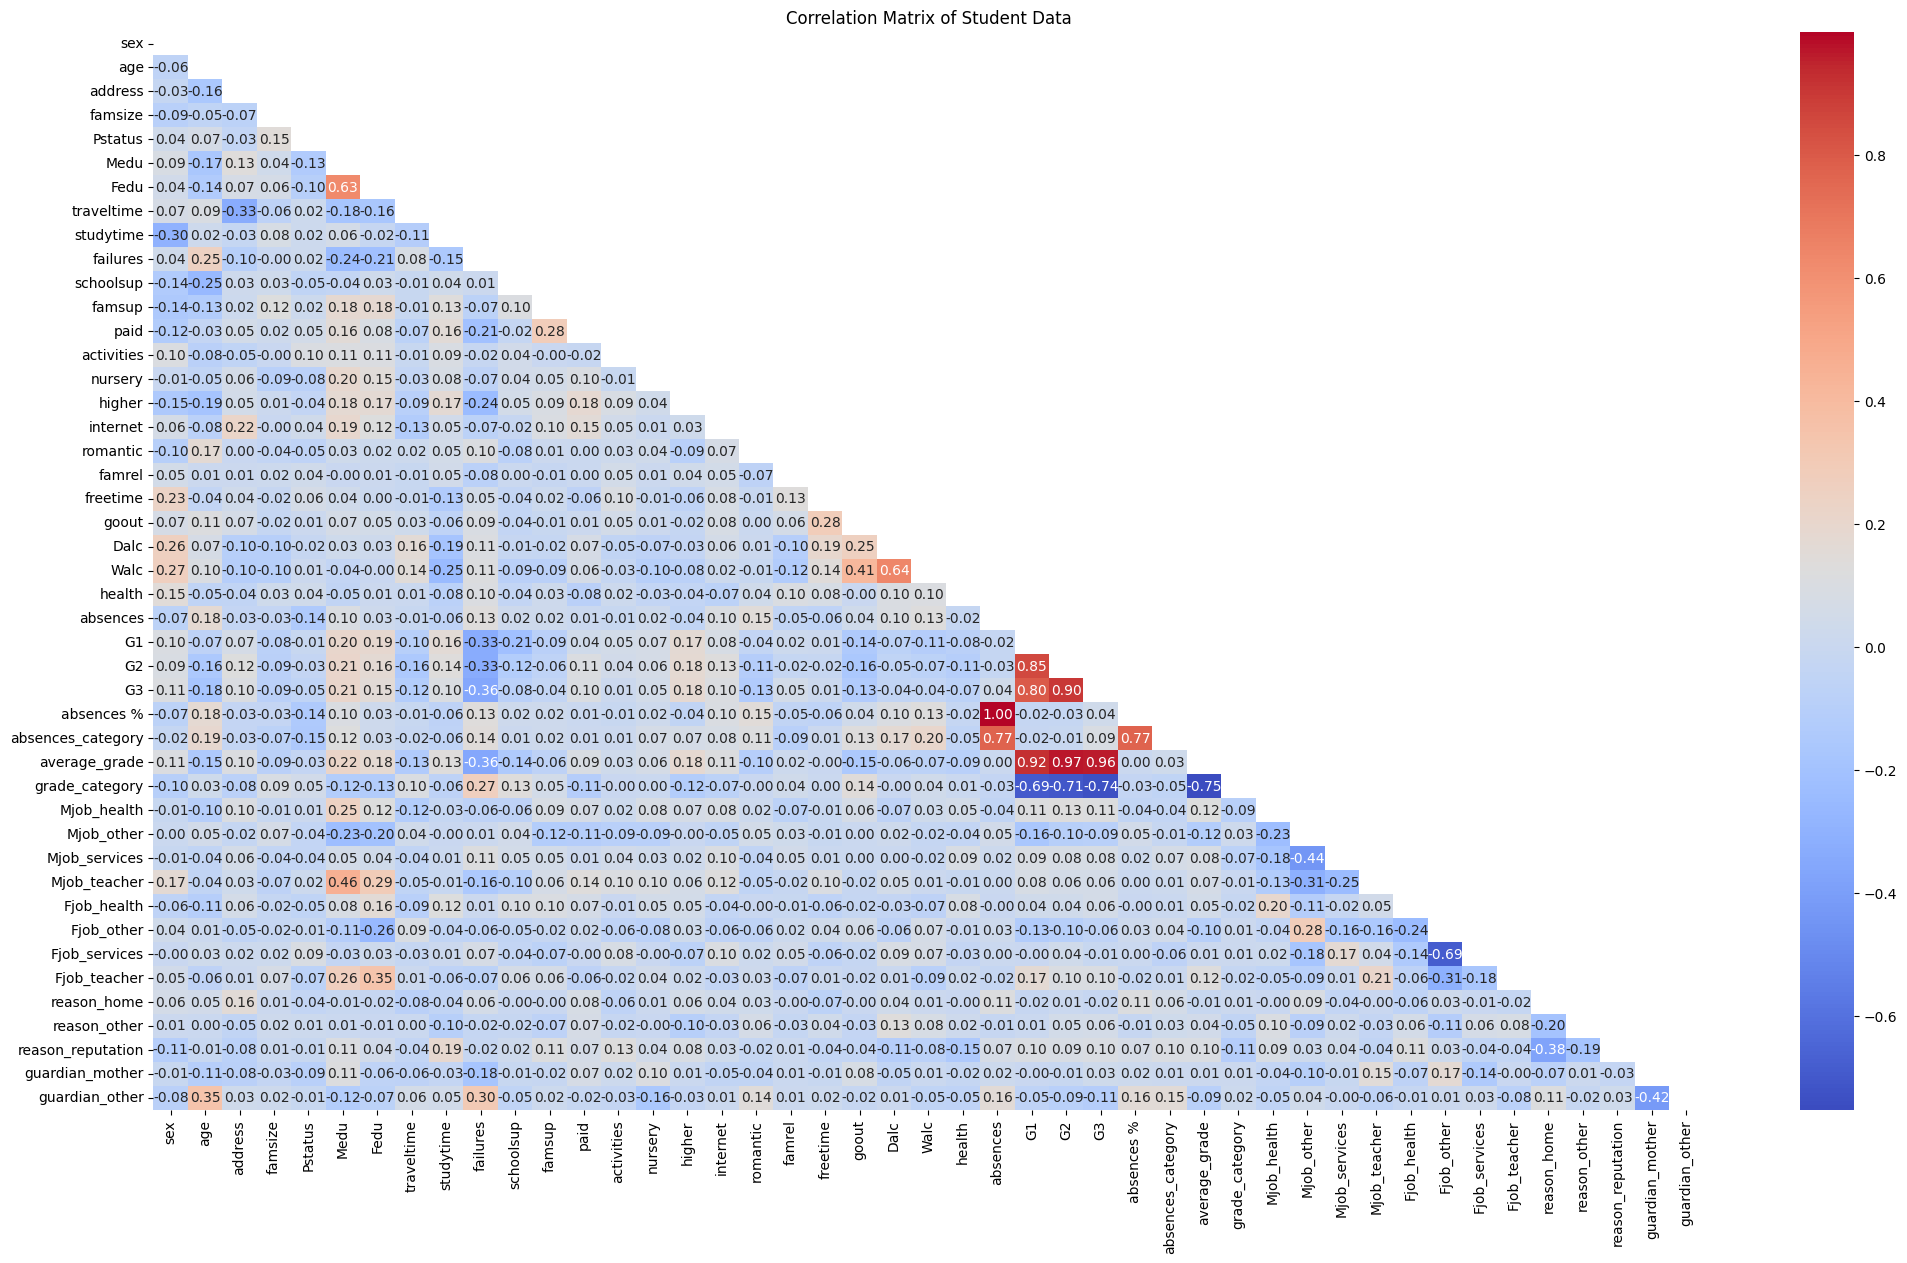

In [31]:
#Plot the Correlation Matrix
plt.figure(figsize=(25, 14))

#Mask to truncate heatmap to reduce reduncancy of data visulaization. 
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f", mask=mask)
plt.title('Correlation Matrix of Student Data')

plt.show()

### Observations:
Postitive Correlation 13% between study time and average grades. There is a Negative correlation of 15% between going out and average grades!

Negative correlation of -25% for going out and study time. There is a postive correlation of 41% for going out and drinking alcohol on weekends and a postive correlation of 25% between going out and weekday alcohol consumption. There is also a postive correlations between going out, drinking alcohol and failing classes. 

## Saving df_encoded to use for ML

In [32]:
import os

print(os.getcwd())

/Users/vcarrillo/Springboard/Capstone_2_Student_data


In [33]:
df_encoded.to_csv('df_encoded.csv', index=False)

print("File saved as 'df_encoded.csv'")

File saved as 'df_encoded.csv'
